In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime

import string

import warnings
warnings.filterwarnings('ignore', message='FixedFormatter')

respath = '../mFigures/'
date = datetime.today().strftime('%d%m%y')

/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/639402662.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def read_res_sheets(cohort, res_file = 'Results', date='300323', v=True):
    file = '../'+cohort+'/Results/'+cohort+'_'+res_file+'_'+date+'.xlsx'
    xl = pd.ExcelFile(file)
    for sheet in xl.sheet_names:
        if v: print(cohort+'_'+sheet, end=', ')
        df = xl.parse(sheet) # convert to dataframe
        if res_file =='Results': 
            globals()[cohort+'_'+sheet] = df.set_index('term')
        elif (res_file =='splines') & ('Pval' not in sheet):
            globals()[cohort+'_'+sheet] = pd.concat([df.mean(axis=1), df.min(axis=1), df.max(axis=1)], 
                                                     axis=1).rename(columns={0:'pred', 1:'lower', 2:'upper'})
        else:
            globals()[cohort+'_'+sheet] = df
    # Display names if verbose         
    if v: print('\n')

read_res_sheets('ALSPAC')
read_res_sheets('GENR')    
read_res_sheets('ALSPAC', 'predprobs', '140423')
read_res_sheets('GENR', 'predprobs')

ALSPAC_els_com, ALSPAC_els_fat, ALSPAC_els_int, ALSPAC_pre_com, ALSPAC_pre_fat, ALSPAC_pre_int, ALSPAC_pos_com, ALSPAC_pos_fat, ALSPAC_pos_int, ALSPAC_b1_els_com, ALSPAC_b1_els_fat, ALSPAC_b1_els_int, ALSPAC_b2_els_com, ALSPAC_b2_els_fat, ALSPAC_b2_els_int, ALSPAC_els_comR, ALSPAC_ad_els_com, ALSPAC_ad_els_fat, ALSPAC_ad_els_int, 

GENR_els_com, GENR_els_fat, GENR_els_int, GENR_pre_com, GENR_pre_fat, GENR_pre_int, GENR_pos_com, GENR_pos_fat, GENR_pos_int, GENR_b1_els_com, GENR_b1_els_fat, GENR_b1_els_int, GENR_b2_els_com, GENR_b2_els_fat, GENR_b2_els_int, GENR_els_comR, GENR_ad_els_com, GENR_ad_els_fat, GENR_ad_els_int, 

ALSPAC_els_exerc_pps, ALSPAC_els_mdiet_pps, ALSPAC_els_sleep_pps, 

GENR_els_exerc_pps, GENR_els_mdiet_pps, GENR_els_sleep_pps, GENR_pos_exerc_pps, GENR_pos_mdiet_pps, GENR_pos_sleep_pps, GENR_pre_exerc_pps, GENR_pre_mdiet_pps, GENR_pre_sleep_pps, 



In [3]:
# General plotting settings
# Set up size of text in figures
f1 = 20
f2 = 18
f3 = 14

lbls=['High internalizing','High adiposity', 'Comorbidity']
clrs=['royalblue','orange','indianred']

mods = {'exerc':['Physical activity','Physical activity\ frequency'],
        'sleep':['Sleep','Sleep\ duration'],
        'mdiet':['Diet','Mediterranean\ diet\ score']}

# create colormap
def make_map(colors, n=5):
    return matplotlib.colors.LinearSegmentedColormap.from_list("", colors, N=n)


## Figure 1

In [4]:
ALSP = pd.read_csv('../ALSPAC/Data/byimp/imp0.csv'); print(ALSP.shape)
GENR = pd.read_csv('../GENR/Data/byimp/imp0.csv'); print(GENR.shape)

(8428, 469)
(4268, 219)


/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/1211918372.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(ALSP[var+'_age'], hist=False, kde=True, ax=ax, color='salmon',
/Users/Serena/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/1211918372.py:8: UserWarning: 

`distplot` is a deprecated function an

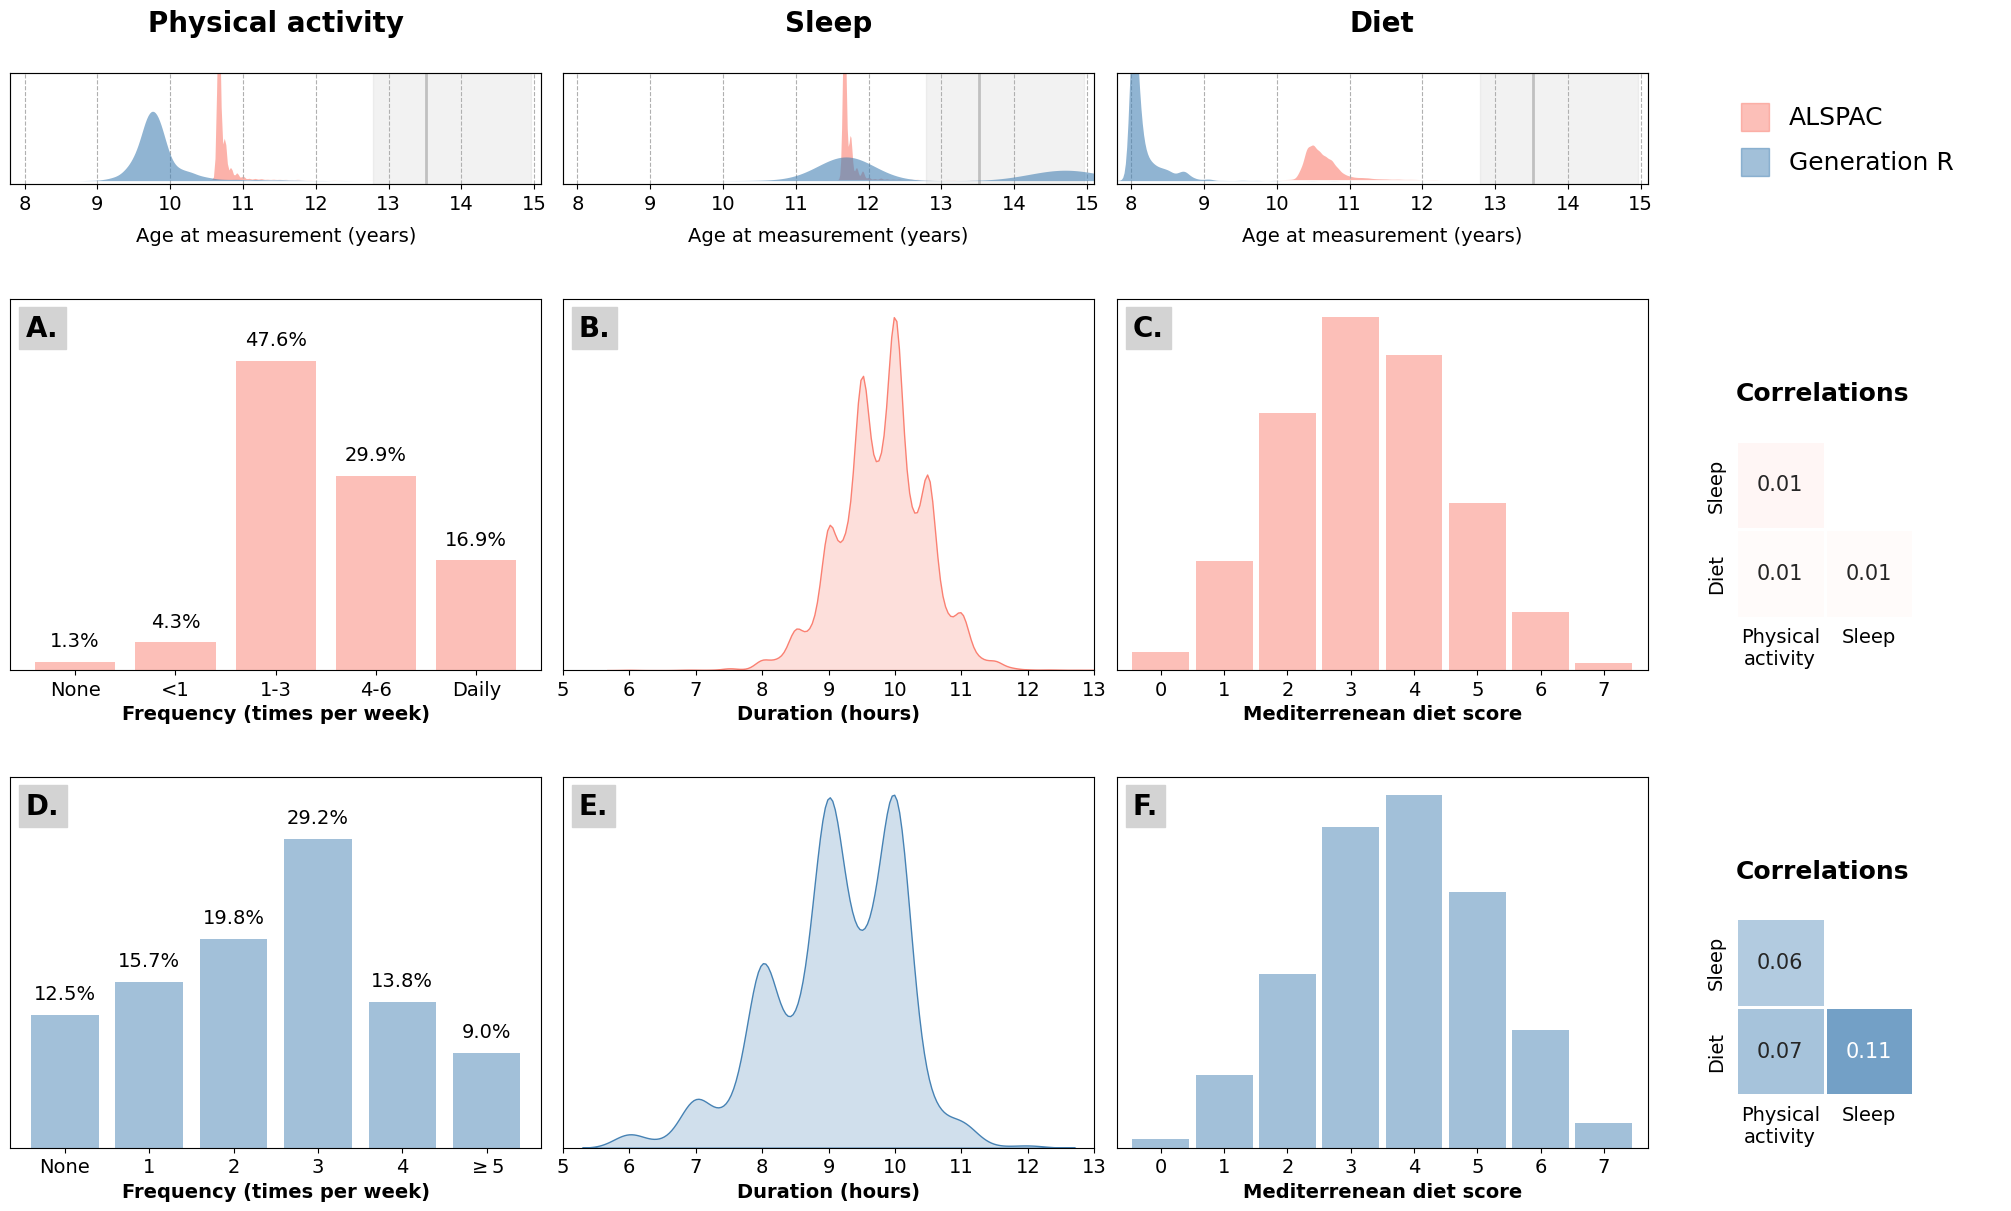

In [6]:
# Lifestyle descriptives figure
def ages_plot(ax, var):
    # ALSPAC
    p = sns.distplot(ALSP[var+'_age'], hist=False, kde=True, ax=ax, color='salmon', 
             kde_kws = {'shade': True,'linewidth': 0, 'alpha':0.6})
    # Generation R        
    ax2 = ax.twinx()
    sns.distplot(GENR[var+'_age'], hist=False, kde=True, ax=ax2, color='steelblue', 
                 kde_kws = {'shade': True,'linewidth': 0, 'alpha':0.6})
    ax2.set_ylim(-0.1,3)
    ax2.get_yaxis().set_visible(False)
    # Get data
#     data = pd.DataFrame({'g': GENR[var+'_age'], 'a': ALSP[var+'_age'], }).melt()
#     data['dummy'] = 0
#     # Plot it 
#     p = sns.violinplot(ax=ax, data=data, x='value', y='dummy', hue='variable', split=True, 
#                        palette = ['steelblue','salmon'], 
#                        scale='count', width=1, orient='h', inner=None, linewidth=0)
    # Clean axes and set limits
    p.set(ylabel=None, yticks=[], ylim=(-0.3,7), xlim=(7.8,15.1)) # 
    p.legend([],[], frameon=False)
    # Adjust color
    plt.setp(p.collections, alpha=.6)
    # Add vertical grid
    ax.grid(which='major', axis='x', linestyle='--')
    # Add reference outcome measured
    age_avg = (ALSP.age_child.mean()+GENR.age_child.mean())/2
    age_min = max(ALSP.age_child.min(), GENR.age_child.min())
    age_max = min(ALSP.age_child.max(), GENR.age_child.max())
    ax.axvline(age_avg, color = 'silver', ls = '-', lw = 2)
    ax.axvspan(age_min,age_max,color = 'silver', alpha=0.2)
    
    for spine in ax.spines.values(): spine.set_edgecolor('grey')
    # Add x- axis ticks and label
    ax.set_xlabel('Age at measurement (years)', fontsize=f3, labelpad=10)
    # ax.xaxis.set_label_position('top') 
    ax.set_xticklabels(list(range(7,16)), fontsize=f3);
    # Add title
    ax.set_title(mods[var][0], fontsize=f1, fontweight='bold', pad=30)
    
def hist_exerc(ax, cohort):
    lvls = ['none','<1 week','1-3 week','4-6 week','daily'] if cohort=='ALSP' else ['none','1 week','2 week','3 week','4 week','>=5 week']
    lbls = ['None','<1','1-3','4-6','Daily'] if cohort=='ALSP' else ['None','1','2','3','4',r'$\geq$5']
    colr = 'salmon' if cohort=='ALSP' else 'steelblue'
    df = globals()[cohort]['exerc_fac'].value_counts().loc[lvls]
    p = df.plot.bar(ax=ax, color=colr, alpha=0.5, width=.8)
    
    for i, val in enumerate(df):
        perc = round(val/df.sum()*100,1)
        p.text(i, val+(df.max()/20), str(perc)+'%', ha='center', fontsize=f3)
    
    p.set_xticklabels(lbls, rotation=0, fontsize=f3)
    p.set_yticks([])
    p.set_ylim(0,df.max()+(df.max()/5))
    p.set_xlabel('Frequency (times per week)', fontsize=f3, fontweight='bold')
    p.set_ylabel('', fontsize=f2)
    p.set_title('\n', fontsize=f3)

def dense_plot(ax, cohort, var):
    colr = 'salmon' if cohort=='ALSP' else 'steelblue'
    if var=='SRsleep': colr = 'lightsteelblue'
    title, xlab, xlim = ['Diet','Mediterrenean diet score',(-0.7,7.7)] if var =='mdiet' else [
                         'Sleep','Duration (hours)',(5,13)]
    df = globals()[cohort]
    if var =='sleep': 
        sns.kdeplot(df[var], ax=ax, color=colr, shade=True, linewidth=1)
    else: 
        df[var].value_counts().loc[range(8)].plot.bar(ax=ax, color=colr, alpha=0.5, width=.9)
        # sns.distplot(df[var], hist=True, kde=False, ax=ax, color=colr, bins=14)
    ax.set_xlabel(xlab, fontsize=f3, fontweight='bold')
    ax.set_ylabel('', fontsize=f2)
    ax.set_yticks([])
    xlbs = range(0,8) if var=='mdiet' else range(xlim[0],xlim[1]+1)
    ax.set_xticklabels(list(xlbs), fontsize=f3, rotation=0)
    ax.set_xlim(xlim)
    ax.set_title('\n', fontsize=f3)
    
    
def corrs_plot(ax, cohort):
    cor = globals()[cohort][['exerc','sleep','mdiet']].corr()
    maskmat = np.triu(cor)
    
    cmap = make_map(['w','salmon'], 30) if cohort=='ALSP' else make_map(['w','steelblue'],30)
    
    cm = sns.heatmap(cor, ax=ax, annot=True, fmt='.2f', square=True, annot_kws={"size":15},
            cmap=cmap, vmin=0, vmax=0.15, linewidths=1,
            xticklabels = ['Physical\nactivity\n\n','Sleep\n\n\n',''], yticklabels = ['','\n\nSleep','\n\nDiet'],
            cbar=False, mask=maskmat)
    
    ax.tick_params(axis='both', which='major', labelsize = f3, left=False, bottom=False)
    ax.set_title('Correlations', fontsize=f2, fontweight='bold', y=1, pad=-35, loc='left')

    
# ----------------------------------------------------------------
f = plt.figure(constrained_layout=True, figsize=(20, 12))

axs = f.subplot_mosaic('ABCx;DEFG;HIJK', height_ratios=[0.6,2,2], width_ratios=[2,2,2,1])

# axs['x'].set_visible(False)
axs['x'].set(xlim=(0,1), ylim=(0,1))
axs['x'].axis('off')
axs['x'].plot(0.07, 0.6, 's', ms=20, alpha=.5, color='salmon')
axs['x'].plot(0.07, 0.2, 's', ms=20, alpha=.5, color='steelblue')
axs['x'].text(0.2, 0.6, 'ALSPAC', fontsize=f2, va='center')
axs['x'].text(0.2, 0.2, 'Generation R', fontsize=f2, va='center')

ages_plot(axs['A'], 'exerc')
ages_plot(axs['B'], 'sleep')
ages_plot(axs['C'], 'mdiet')

hist_exerc(axs['D'],'ALSP')
dense_plot(axs['E'],'ALSP','sleep')
dense_plot(axs['F'],'ALSP','mdiet')
corrs_plot(axs['G'],'ALSP')

hist_exerc(axs['H'],'GENR')
dense_plot(axs['I'],'GENR','sleep') #; dense_plot(axs['I'],'GENR','SRsleep')
dense_plot(axs['J'],'GENR','mdiet')
corrs_plot(axs['K'],'GENR')

for n, an in enumerate(list('DEFHIJ')):
    aa = axs[an]
    aa.text(0.03, 0.96, string.ascii_uppercase[n]+'.', va='top', 
            transform=aa.transAxes, size=f1, weight='bold',
            bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', pad=5))

f.savefig(respath+'1.Mod-descr_revised.pdf', dpi=400)

## Figure 2

In [9]:

# bold significant
def bold_sign(m, ax):
    sign = m.reset_index().index[m['p.value']<0.050].to_list()
    for pos in sign:
        ax.get_yticklabels()[pos].set_weight("bold") 

def plot_maineff(ax, cohort, els='ELS_z', out_name = 'Comorbidity'):
    
    exp = els[:3].lower()
    out = 'fat' if out_name=='Adiposity' else out_name[:3].lower()
    
    d = globals()[cohort+'_'+exp+'_'+out]
    if out =='com': d = d.loc[d['y.level']=='H:comorb']
    
    mod_est = d.loc[d.index.str.contains('^exerc|^sleep|^mdiet', na=False)]
    els_est = d.loc[els][:3]
    
    mod_labels = ['Physical\nactivity','Sleep','Diet']
    
    c='k'; fmt='s'; ms=10; elw=3; cap=10
    
    if out =='com': # Plot OR comorbidity
        ax.errorbar(mod_est['OR'], mod_labels, xerr = [mod_est['OR']-mod_est['lci'], mod_est['uci']-mod_est['OR']], 
                    color=c, fmt=fmt, ms=ms, elinewidth=elw, capsize=cap, label='Lifestyle\nfactors')
        ax.errorbar(els_est['OR'], mod_labels, xerr = [els_est['OR']-els_est['lci'], els_est['uci']-els_est['OR']], 
                    color=c, fmt=fmt, ms=ms, elinewidth=elw, capsize=cap, label='ELS', alpha=0.3)
        ref = 1; xlim = (0.5,4); xlab = 'OR estimate (comorbid vs. healthy)'
    else: # Plot betas
        ax.errorbar(mod_est['estimate'], mod_labels, xerr = list(mod_est['std.error']*1.96), 
                    color=c, fmt=fmt, ms=ms, elinewidth=elw, capsize=cap, label='Lifestyle\nfactors')
        ax.errorbar(els_est['estimate'], mod_labels, xerr = list(els_est['std.error']*1.96),
                    color=c, fmt=fmt, ms=ms, elinewidth=elw, capsize=cap, label='ELS', alpha=0.3)
        ref = 0; xlim = (-0.13,0.5); xlab = r'$\beta $ estimate'
    
    # Add vertical dotted line indicating beta = 0 or OR = 1.
    ax.axvline(x = ref, color = 'grey', ls = '--', lw = 1)
    # Add axis limits
    ax.set_xlim(xlim)
    ax.set_ylim(-0.6, 2.6)
    # Invert y-axis
    ax.invert_yaxis()
    # Adjust axis parameter
    ax.tick_params(axis='both', which='major', labelsize = f3)
    # Add x-label 
    ax.set_xlabel(xlab, fontsize = f2, labelpad = 7)
    # Add a title 
    ax.set_title('\n'+out_name+' - Main effects', fontweight = 'bold', fontsize = f1, pad = 10) #'\n'+out_name
    # Add legend
    ax.legend(fontsize=f3, loc='upper right', ncol=1, framealpha=0) # bbox_to_anchor=(1, 1.1),
    # Bold significant terms
    bold_sign(mod_est, ax)  

def plot_interac(ax, cohort, mod, els='ELS_z', out_name='Comorbidity'):
    
    exp = els[:3].lower()
    d = globals()[cohort+'_'+exp+'_'+mod+'_pps']
    
    lvls = d[mod].unique()
    if mod=='sleep': lvls = lvls[:-1]
    if (cohort=='ALSPAC' and mod=='exerc'): lvls = lvls[:-1]
    
    cmap = make_map(['#99000d','violet','royalblue','forestgreen'], n=len(lvls)) # blue #0c2c84
    
    exerc_frq = ['None','<1 time p.w.','1-3 times p.w.','4-6 times p.w.','Daily'] if cohort=='ALSPAC' else [
                 'None','1 time p.w.','2 times p.w.','3 times p.w.','4 times p.w.',r'$\geq$5 times p.w.']
    
    mods = {'exerc':['Physical activity','Physical\ activity\ frequency', exerc_frq],
            'sleep':['Sleep','Sleep\ duration', [str(h)+' hours' for h in lvls]],
            'mdiet':['Diet','Mediterranean\ diet\ score', lvls]}

    for i, v in enumerate(lvls):
        ss = d.loc[d[mod]==v].set_index(els)
        
        ax.plot(ss['mean'], '--', dashes=(6, 1), label=mods[mod][2][i], color=cmap(i))
        ax.fill_between(ss.index, ss.lower, ss.upper, color=cmap(i), alpha=0.05)
    
    # Add axis limits
    ax.set(xlim = (-1.75, 4.75), ylim = (0.0, 0.6))
    # Adjust axis parameter
    ax.tick_params(axis='both', which='major', labelsize = f3)
    # Add x and y-label 
    ax.set_xlabel('ELS (z-score)', fontsize = f2, labelpad = 7)
    ax.set_ylabel('prob(comorbidity)', fontsize = f2, labelpad = 7)
    # Add a title 
    ax.set_title('\nELS * '+mods[mod][0], fontweight = 'bold', fontsize = f1, pad = 10) #'\n'+out_name
    # Add legend
    ax.legend(loc='upper left', ncol=1, fontsize=f3, framealpha=0, # bbox_to_anchor=(1, 1.1),
              title='$\\bf{'+mods[mod][1]+'}$', title_fontsize=f3, alignment='left')
        

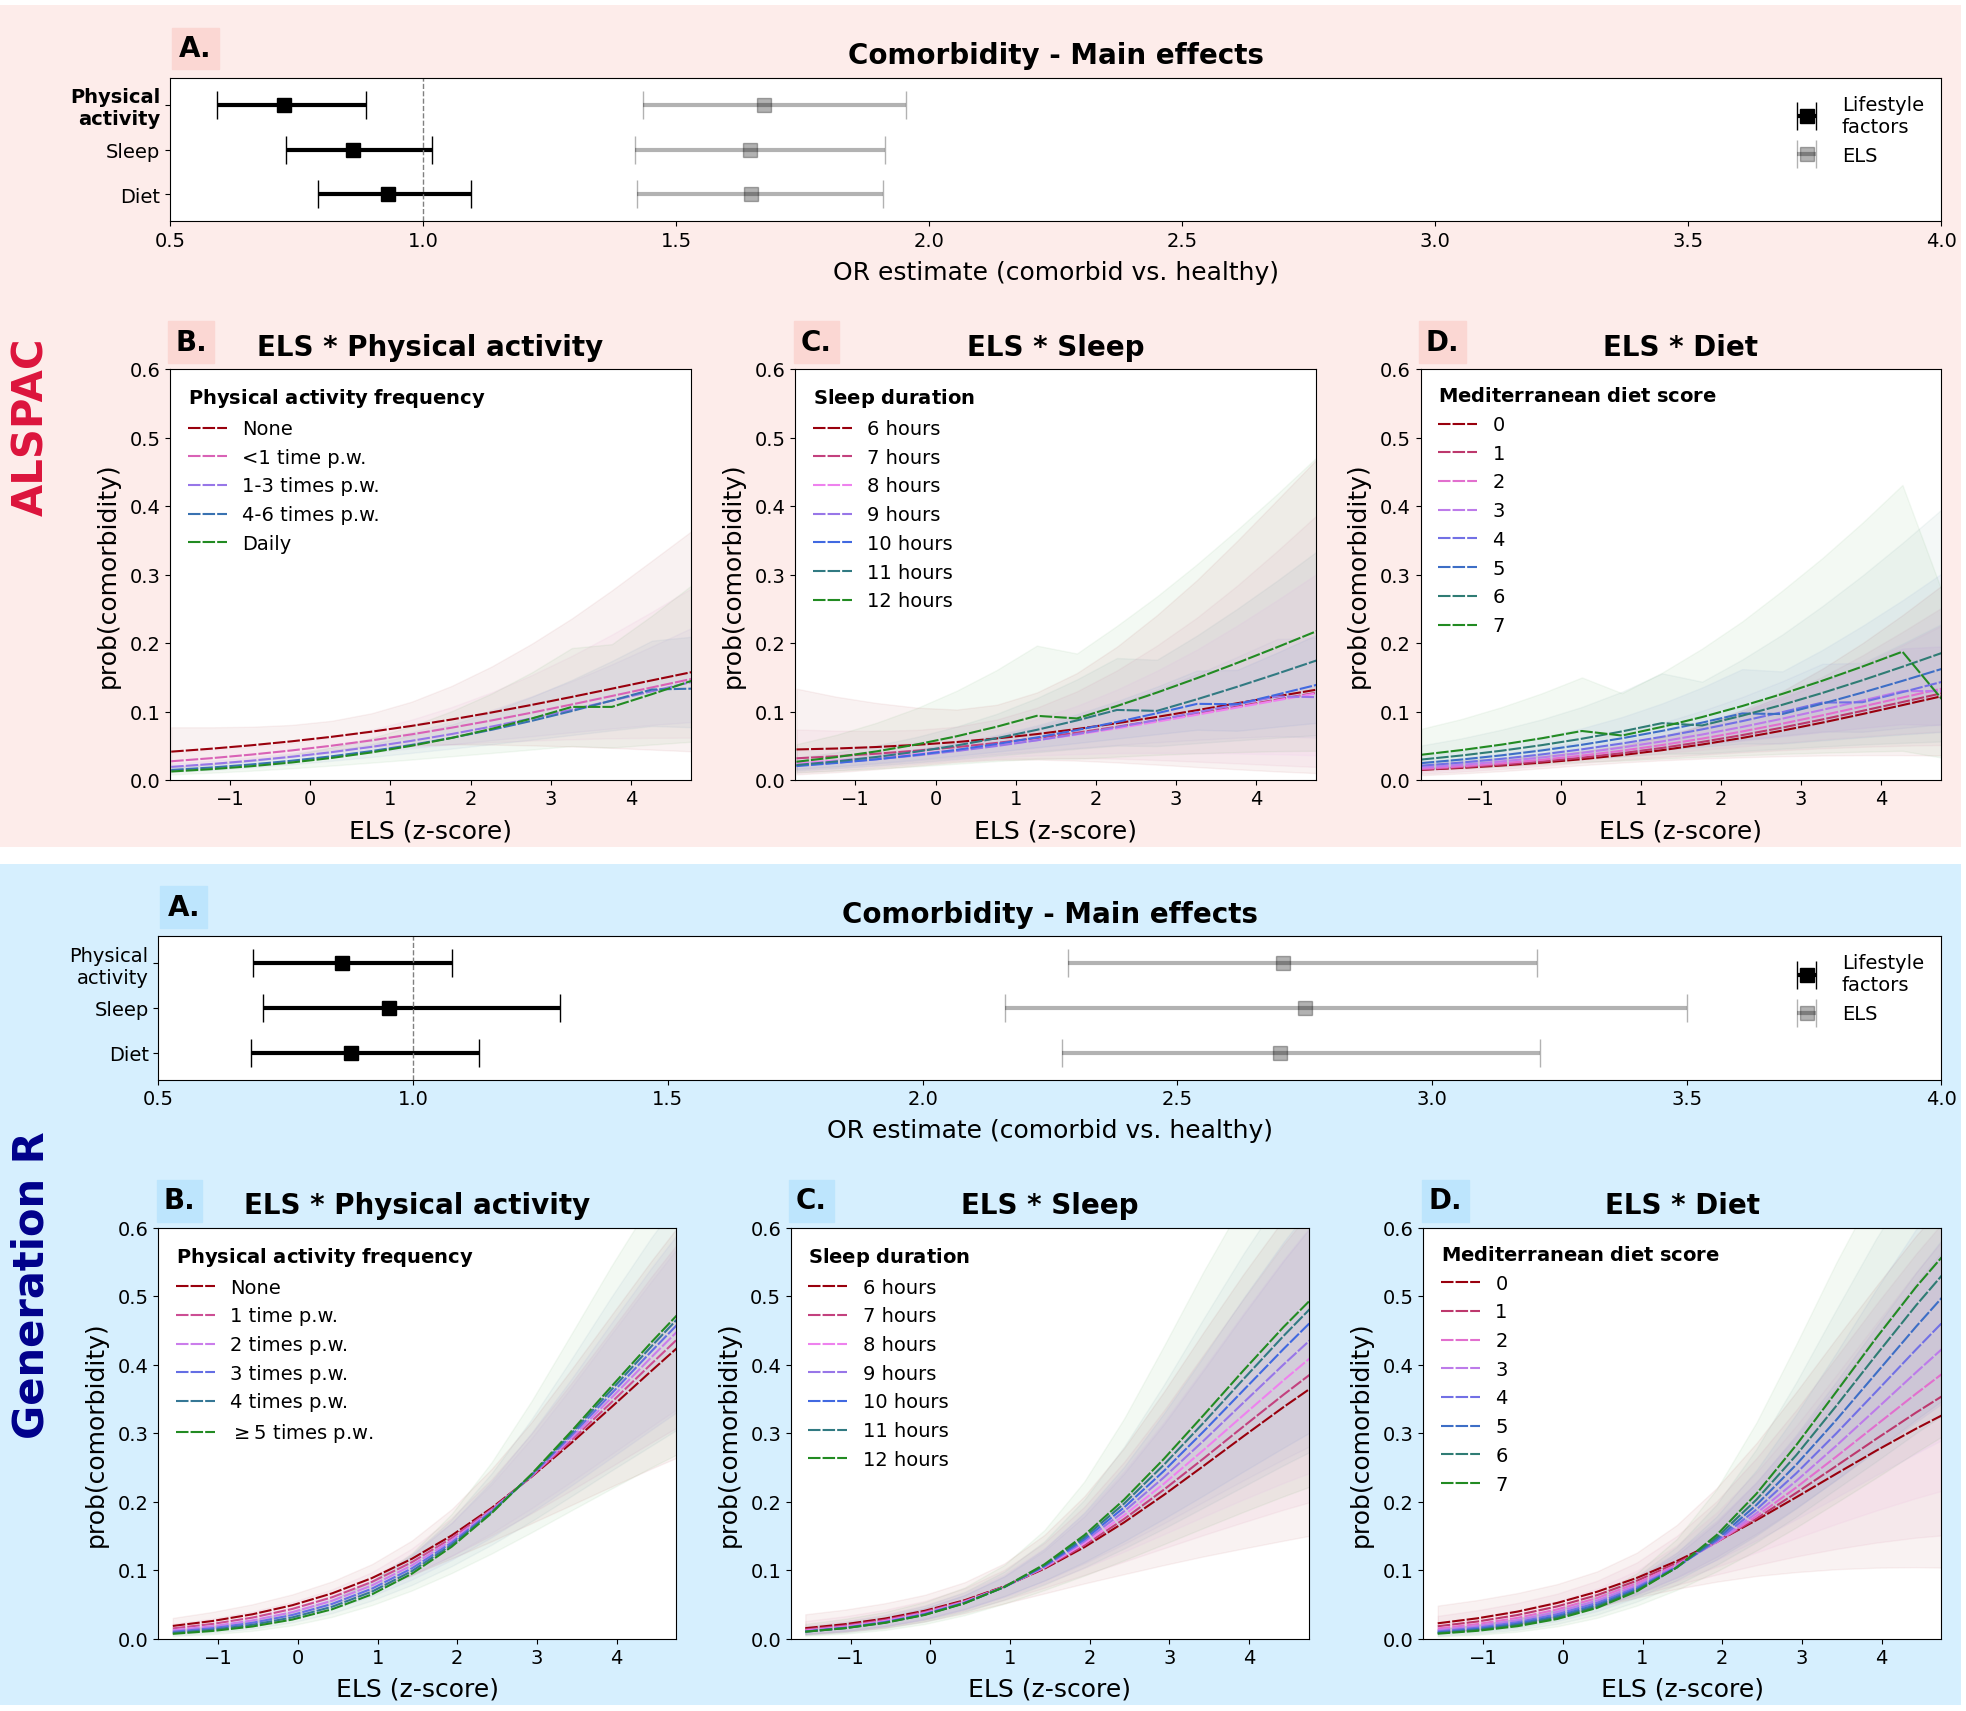

In [10]:
def fig_setup(subf, cohort, els='ELS_z'):
    background = '#FDECEA' if cohort == 'ALSPAC' else '#D6EFFE' # pink and lightblue
    subf.set_facecolor(background)
    
    axs = subf.subplot_mosaic('.AAA;.BCD', height_ratios=[0.7,2], width_ratios=[0.4,2,2,2]) #"xAAAAy;BBCCDD" sharey=True
    
    plot_maineff(axs['A'], cohort, els=els)
    plot_interac(axs['B'], cohort, 'exerc', els=els)
    plot_interac(axs['C'], cohort, 'sleep', els=els)
    plot_interac(axs['D'], cohort, 'mdiet', els=els)
    
    for n, an in enumerate(list('ABCD')):
        aa = axs[an]; pos = [0.005, 1.3] if an=='A' else [0.01,1.1]
        colr='#fbd7d3' if cohort=='ALSPAC' else '#bde5fd'
        aa.text(pos[0], pos[1], an+'.', va='top', 
            transform=aa.transAxes, size=f1, weight='bold',
            bbox=dict(facecolor=colr, edgecolor=colr, pad=5))

    
    title = 'Generation R' if cohort == 'GENR' else 'ALSPAC'
    clr_title = 'darkblue' if cohort == 'GENR' else 'crimson'
    subf.text(0.035, 0.5, title, fontweight='bold', fontsize=f1+10, color=clr_title, rotation=90, 
              ha='center', va='center')


f = plt.figure(constrained_layout=True, figsize=(20, 17))

subf1, subf2 = f.subfigures(2, 1, wspace=0.2)

fig_setup(subf1, 'ALSPAC')
fig_setup(subf2, 'GENR')

f.savefig(respath+'2.Main-results_revised.pdf', dpi=400)

## Linear models 

In [11]:
read_res_sheets('ALSPAC', 'simpslopes', '170423')
read_res_sheets('GENR', 'simpslopes', '170423')

ALSPAC_adi_exerc_ssl, ALSPAC_adi_mdiet_ssl, ALSPAC_adi_sleep_ssl, ALSPAC_int_exerc_ssl, ALSPAC_int_mdiet_ssl, ALSPAC_int_sleep_ssl, 

GENR_adi_exerc_ssl, GENR_adi_mdiet_ssl, GENR_adi_sleep_ssl, GENR_int_exerc_ssl, GENR_int_mdiet_ssl, GENR_int_sleep_ssl, 



In [12]:
def plot_lninter(ax, cohort, mod, els='ELS_z', out_name=''):
    
    exp = els[:3].lower()
    out = out_name[:3].lower()
    d = globals()[cohort+'_'+out+'_'+mod+'_ssl'] # .set_index(mod)
    
    cmap = make_map(['#99000d','violet','royalblue','forestgreen'], n=d.shape[0]) # blue #0c2c84
    
    exerc_frq = ['None','<1 time p.w.','1-3 times p.w.','4-6 times p.w.','Daily'] if cohort=='ALSPAC' else [
                 'None','1 time p.w.','2 times p.w.','3 times p.w.','4 times p.w.',r'$\geq$5 times p.w.']
    
    mods = {'exerc':['Physical activity','Physical\ activity\ frequency', exerc_frq],
            'sleep':['Sleep','Sleep\ duration', [str(h)+' hours' for h in list(range(6,14))]],
            'mdiet':['Diet','Mediterranean\ diet\ score', list(range(0,8))]}
    
    x = np.linspace(-1.75, 4.75)
    
    # Intercept 
    if out =='adi': out='fat'
    res = globals()[cohort+'_'+exp+'_'+out]
    icpt = res.loc[res.model==mod+'_z'].loc['(Intercept)','estimate']
    p = float(res.loc[res.index.str.contains(':'+mod,na=False), 'p.value'])
    
    for i, e in enumerate(d['mean']):
        ax.plot(x, e*x, '--', dashes=(6, 1), label = mods[mod][2][i], color=cmap(i))
        ax.fill_between(x, d.lower[i]*x, d.upper[i]*x, color=cmap(i), alpha=0.05)

    # Add axis limits
    ax.set( xlim = (-1.75, 4.75), ylim = (-0.5, 2)) # 
    # Adjust axis parameter
    ax.tick_params(axis='both', which='major', labelsize = f3)
    # Add x and y-label 
    ax.set_xlabel('ELS (z-score)', fontsize = f2, labelpad = 7)
    if not mod=='exerc': 
        ax.set_ylabel('') 
    else: 
        ax.set_ylabel(out_name+' (z-score)', fontsize = f2, fontweight='bold', labelpad = 7)
    # Add a title 
    ax.set_title('ELS * '+mods[mod][0], fontweight = 'bold', fontsize = f1, pad = 10) #'\n'+out_name
    # Add legend
    ax.legend(loc='upper left', ncol=1, fontsize=f3, framealpha=0, # bbox_to_anchor=(1, 1.1),
              title='$\\bf{'+mods[mod][1]+'}$', title_fontsize=f3, alignment='left')
    # Add p-value
    ax.text(3.3,-0.4,'P*= %.3f'%p, fontsize=f3)


/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/674846106.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = float(res.loc[res.index.str.contains(':'+mod,na=False), 'p.value'])
/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/674846106.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = float(res.loc[res.index.str.contains(':'+mod,na=False), 'p.value'])
/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/674846106.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p = float(res.loc[res.index.str.contains(':'+mod,na=False), 'p.value'])
/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/674846106.py:22: FutureWarning: Callin

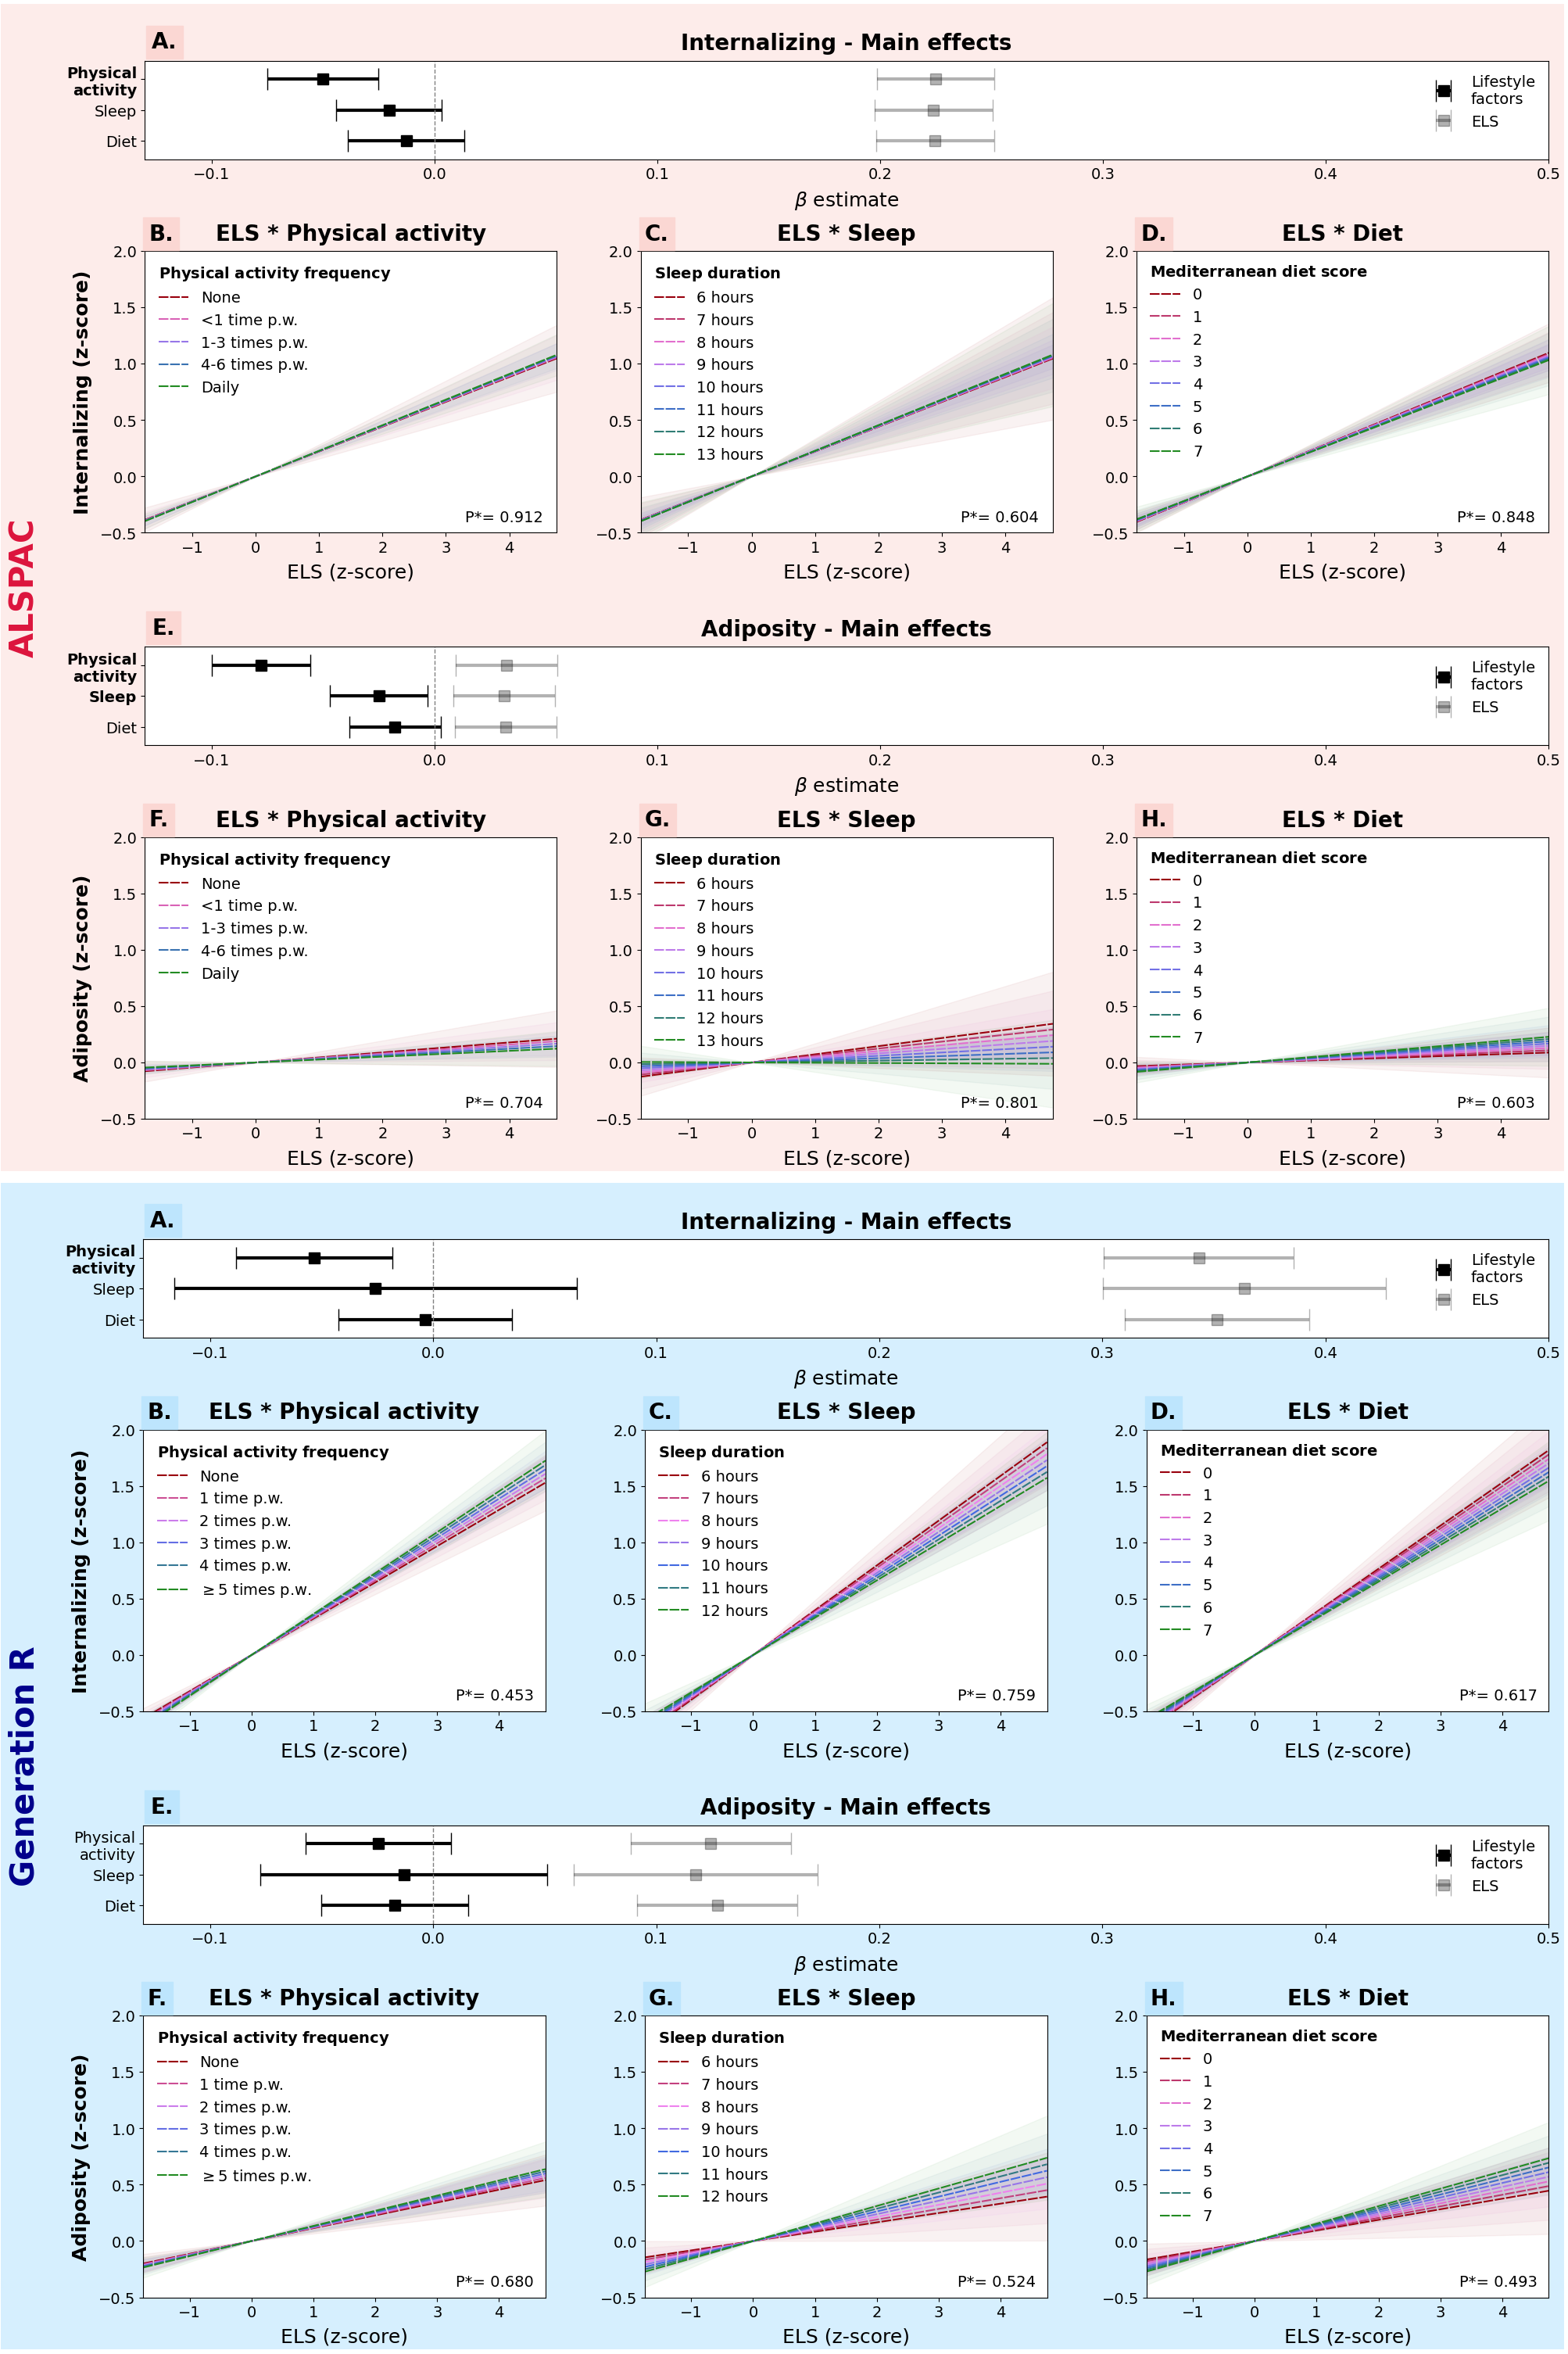

In [13]:
def fig_setup(subf, cohort, els='ELS_z'):
    background = '#FDECEA' if cohort == 'ALSPAC' else '#D6EFFE' # pink and lightblue
    subf.set_facecolor(background)
    
    axs = subf.subplot_mosaic('.AAA;.BCD;.EEE;.FGH', height_ratios=[.7,2, .7,2], 
                              width_ratios=[0.3]+[2]*3) #"xAAAAy;BBCCDD" sharey=True
    
    plot_maineff(axs['A'], cohort, els=els, out_name='Internalizing')
    plot_lninter(axs['B'], cohort, 'exerc', els=els, out_name='Internalizing')
    plot_lninter(axs['C'], cohort, 'sleep', els=els, out_name='Internalizing')
    plot_lninter(axs['D'], cohort, 'mdiet', els=els, out_name='Internalizing')
    plot_maineff(axs['E'], cohort, els=els, out_name='Adiposity')
    plot_lninter(axs['F'], cohort, 'exerc', els=els, out_name='Adiposity')
    plot_lninter(axs['G'], cohort, 'sleep', els=els, out_name='Adiposity')
    plot_lninter(axs['H'], cohort, 'mdiet', els=els, out_name='Adiposity')
    
    title = 'Generation R' if cohort == 'GENR' else 'ALSPAC'
    clr_title = 'darkblue' if cohort == 'GENR' else 'crimson'
    subf.text(0.015, 0.5, title, fontweight='bold', fontsize=f1+10, color=clr_title, rotation=90, 
              ha='center', va='center')
    
    for n, an in enumerate(list('ACDEBFGH')):
        aa = axs[an]; pos = [0.005, 1.3] if an in['A','E'] else [0.01,1.1]
        colr='#fbd7d3' if cohort=='ALSPAC' else '#bde5fd'
        aa.text(pos[0], pos[1], an+'.', va='top', 
            transform=aa.transAxes, size=f1, weight='bold',
            bbox=dict(facecolor=colr, edgecolor=colr, pad=5))


f = plt.figure(constrained_layout=True, figsize=(20, 30))

subf1, subf2 = f.subfigures(2, 1, hspace=0.01)

fig_setup(subf1, 'ALSPAC')
fig_setup(subf2, 'GENR')

f.savefig(respath+'3.Lin-results_revised.pdf', dpi=400)

In [130]:
def check_slope(cohort, mod, out):
    cohort['sleep'] = round(cohort['sleep'])
    sns.lmplot(x="ELS_z", y=out, 
           hue=mod , scatter=False, palette='viridis',
           data=cohort, truncate=False)

# for m in ['exerc','sleep','mdiet']:
#     check_slope(ALSP, m, out='adipos_z')

## SF3

## NON LINEARITY 

In [14]:
read_res_sheets('ALSPAC','splines') # Gotta fix the file
read_res_sheets('GENR','splines')

ALSPAC_intern_exerc, ALSPAC_intern_exerc_Pval_poly2, ALSPAC_intern_exerc_Pval_poly3, ALSPAC_intern_sleep, ALSPAC_intern_sleep_Pval_poly2, ALSPAC_intern_sleep_Pval_poly3, ALSPAC_intern_mdiet, ALSPAC_intern_mdiet_Pval_poly2, ALSPAC_intern_mdiet_Pval_poly3, ALSPAC_adipos_exerc, ALSPAC_adipos_exerc_Pval_poly2, ALSPAC_adipos_exerc_Pval_poly3, ALSPAC_adipos_sleep, ALSPAC_adipos_sleep_Pval_poly2, ALSPAC_adipos_sleep_Pval_poly3, ALSPAC_adipos_mdiet, ALSPAC_adipos_mdiet_Pval_poly2, ALSPAC_adipos_mdiet_Pval_poly3, 

GENR_intern_exerc, GENR_intern_exerc_Pval_poly2, GENR_intern_exerc_Pval_poly3, GENR_intern_sleep, GENR_intern_sleep_Pval_poly2, GENR_intern_sleep_Pval_poly3, GENR_intern_mdiet, GENR_intern_mdiet_Pval_poly2, GENR_intern_mdiet_Pval_poly3, GENR_adipos_exerc, GENR_adipos_exerc_Pval_poly2, GENR_adipos_exerc_Pval_poly3, GENR_adipos_sleep, GENR_adipos_sleep_Pval_poly2, GENR_adipos_sleep_Pval_poly3, GENR_adipos_mdiet, GENR_adipos_mdiet_Pval_poly2, GENR_adipos_mdiet_Pval_poly3, 



In [189]:
# ALSPAC_intern_exerc_Pval_poly2.mean(axis=1)
def check_nln(poly='3'):
    for C in ['GENR', 'ALSPAC']:
        for o in ['intern','adipos']:
            for m in ['exerc','sleep','mdiet']:
                d = globals()[f'{C}_{o}_{m}_Pval_poly{poly}']
                print(f'{C}_{o}_{m}------------------------')
                print(list(round(d['V1'],3)), list(round(d.mean(axis=1),3)))
                print(len(np.where(d < 0.05)[1]))
# xcheck_nln()

/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/2699163197.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if mod == 'sleep': ax.set_xticklabels(list(range(5, 14)))
/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_34117/2699163197.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if mod == 'sleep': ax.set_xticklabels(list(range(5, 14)))


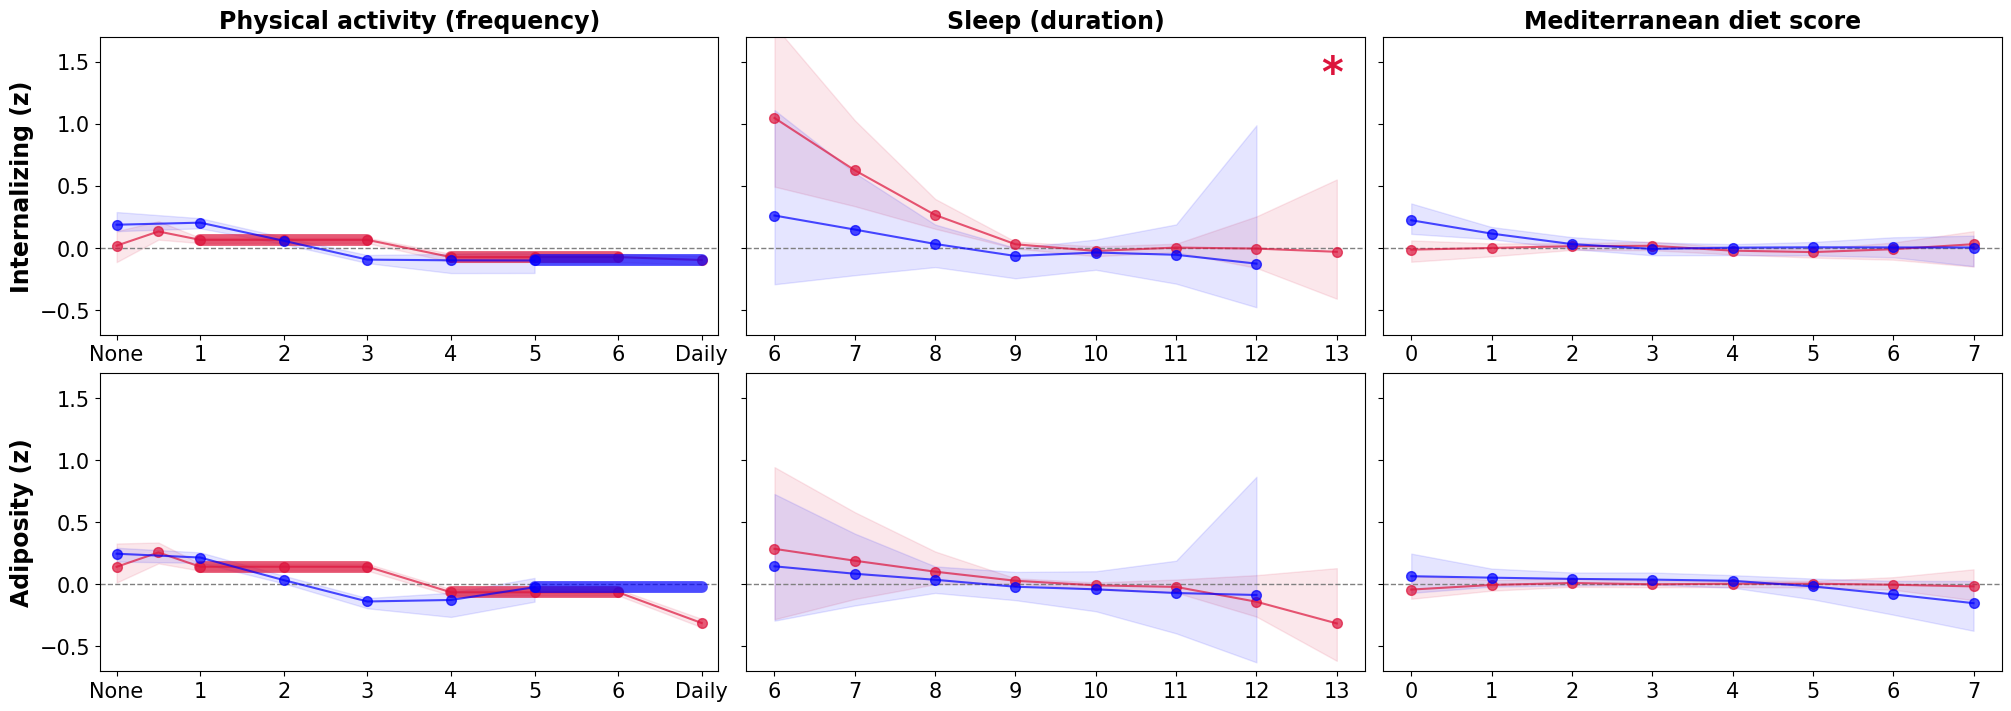

In [15]:
f, axs = plt.subplots(2,3,constrained_layout=True, figsize=(20, 7), sharey=True)

ms = {'exerc':'Physical activity (frequency)','sleep':'Sleep (duration)','mdiet':'Mediterranean diet score'}

def plot_spline(ax, outc, mod):
    
    dG = globals()['GENR_'+outc+'_'+mod]
    dA = globals()['ALSPAC_'+outc+'_'+mod]
    if mod=='exerc':
        dA['val'] = [0,0.5,2,5,7]
        dA = dA.set_index('val')
        dA = pd.concat([dA.loc[0:.5],
                        pd.DataFrame(np.repeat([dA.loc[2],dA.loc[5]],3, axis=0), index=list(range(1,7)), columns=dA.columns), 
                        pd.DataFrame(dA.loc[7]).T])
    
    ax.axhline(y = 0, color = 'grey', ls = '--', lw = 1)
    
    def plax(d, ax, c, span):
        ax.plot(d.pred, '-o', color=c, ms=7, alpha=.7)
        ax.fill_between(d.index, d.lower, d.upper, alpha=0.1, color=c)
        if mod=='exerc':
            for t in span: ax.hlines(y = d.loc[t[0],'pred'], xmin = t[0], xmax = t[1], color=c, lw=8.5, 
                                     capstyle='round', alpha=.7)
    
    plax(dA, ax=ax, c='crimson', span=[(1,3),(4,6)])
    plax(dG, ax=ax, c='blue', span=[(5,7)])
    
    ylab = 'Internalizing (z)' if outc =='intern' else 'Adiposity (z)'
    # Add title only to first line plots
    if outc =='intern': ax.set_title(ms[mod], fontsize=17, fontweight='bold')
    
    if mod =='exerc': 
        # Add y label only to left plots 
        ax.set_ylabel(ylab, fontsize=17, fontweight='bold')
        lbls = ['None','1','2','3','4','5','6','Daily'] #r'$\geq$5'
        ax.set_xticks(range(8)); ax.set_xticklabels(lbls)
        # ax.tick_params(direction = 'in')
        ax.set_xlim(-.2,7.2)
        #axA = ax.twiny()
        #axA.set_xticks([0,0.5,2,5,7]); axA.set_xticklabels(['None','<1','1-3','4-6','Daily'])
        #axA.tick_params(direction = 'in')
        
    if mod == 'sleep': ax.set_xticklabels(list(range(5, 14)))
        
    ax.tick_params(axis='both', which='major', labelsize = 15)
    ax.set_ylim(-.7,1.7)

for r, m in enumerate(ms.keys()):
    plot_spline(axs[0,r], 'intern', m)
    plot_spline(axs[1,r], 'adipos', m)
    
axs[0,1].text(6.8,1.3, '*', fontsize=30, fontweight='bold', color='crimson');

f.savefig(respath+'S3.Non-linearity_revised.pdf', dpi=400)


### Stratified plot of interaction

In [ ]:
def plot_inter(axs, cohort, els='ELS_z', comp='H:multim'):
    
    m1,r1,_ = subset_bin('intr_bin', cohort, els)
    m2,r2,_ = subset_bin('fatm_bin', cohort, els)
    m3,r3,_ = subset_bin('bin', cohort, els)

    ax1,ax2,ax3 = axs
    
    mod_labels = ['Exercise','Sleep','Diet']
    
    # Plot betas inernalizing
    ax1.errorbar(r1['estimate'], mod_labels, xerr = list(r1['std.error']*1.96), color='green',
                 fmt='s', ms=10, elinewidth=3, capsize=10, alpha=0.5)
    ax1.errorbar(m1['estimate'], mod_labels, xerr = list(m1['std.error']*1.96), color='darkviolet',
                 fmt='s', ms=10, elinewidth=3, capsize=10, alpha=0.5)
    # Plot betas adiposity
    ax2.errorbar(r2['estimate'], mod_labels, xerr = list(r2['std.error']*1.96), color='green',
                 fmt='s', ms=10, elinewidth=3, capsize=10, alpha=0.5)
    ax2.errorbar(m2['estimate'], mod_labels, xerr = list(m2['std.error']*1.96), color='darkviolet',
                 fmt='s', ms=10, elinewidth=3, capsize=10, alpha=0.5)
    # Plot OR comorbidity
    ax3.errorbar(r3['OR'], mod_labels, xerr = [r3['OR']-r3['lci'], r3['uci']-r3['OR']], color='green',
                 fmt='s', ms=10, elinewidth=3, capsize=10, alpha=0.5)
    ax3.errorbar(m3['OR'], mod_labels, xerr = [m3['OR']-m3['lci'], m3['uci']-m3['OR']], color='darkviolet',
                 fmt='s', ms=10, elinewidth=3, capsize=10, alpha=0.5)
    
    #add a vertical dotted line indicating beta = 0 or OR = 1.
    ax1.axvline(x = 0, color = 'grey', ls = '--', lw = 1)
    ax2.axvline(x = 0, color = 'grey', ls = '--', lw = 1)
    ax3.axvline(x = 1, ymin = -1, ymax = 4, color = 'grey', ls = '--', lw = 1)
    
    # Add x axis limit 
    ax1.set_xlim(-0.07,0.55); ax2.set_xlim(-0.07,0.55); ax3.set_xlim(0.78,4.3)
    
    # Add legend
    ax3.legend(['','Adhering','Not\nadhering'], fontsize=f3, 
               bbox_to_anchor=(1, 1.1), loc='upper left',ncol=1, framealpha=0)
    
    titles = ['Internalizing', 'Adiposity', 'Comorbidity']
    xlables = [r'ELS $\beta $ estimate',r'ELS $\beta $ estimate','ELS OR estimate (vs. healthy)']
    
    for n,ax in enumerate(axs):
        ax.set_ylim(-0.6,2.6)
        # add x-label 
        ax.set_xlabel(xlables[n], fontsize = f2, labelpad=7)
        # add a title 
        ax.set_title('\n'+titles[n], fontweight = 'bold', fontsize = f1, pad=10)
        # adjust axis parameter
        ax.tick_params(axis='both', which='major', labelsize = f3)
        # invert axis
        ax.invert_yaxis()

# =====================================================
f = plt.figure(constrained_layout=True, figsize=(20, 8))

f.suptitle('INTERACTION', fontsize=f1, fontweight='bold')

subf1, subf2 = f.subfigures(2, 1, wspace=0.2)
subf1.set_facecolor('#D6EFFE') # lightblue
subf2.set_facecolor('#FDECEA') # pink

axs1 = subf1.subplots(1, 3)
axs2 = subf2.subplots(1, 3)

plot_inter(axs1, 'GENR')
plot_inter(axs2, 'ALSPAC')

axs1[0].set_ylabel("\nGENERATION R", fontsize=f1, fontweight='bold', labelpad=20, color='darkblue');
axs2[0].set_ylabel("\nALSPAC", fontsize=f1, fontweight='bold', labelpad=20, color='crimson');

f.savefig(respath+'3.Strat-effects.pdf', dpi=400)

#### Checking correlations

In [3]:
round(ALSP[['exerc','sleep','mdiet','intern','adipos','ELS']].corr(),2)

,exerc,sleep,mdiet,intern,adipos,ELS
exerc,1.00,0.01,0.01,-0.09,-0.20,0.01
sleep,0.01,1.00,0.01,-0.03,-0.04,-0.07
mdiet,0.01,0.01,1.00,-0.02,-0.01,-0.03
intern,-0.09,-0.03,-0.02,1.00,0.11,0.21
adipos,-0.20,-0.04,-0.01,0.11,1.00,0.06
ELS,0.01,-0.07,-0.03,0.21,0.06,1.00


In [4]:
round(GENR[['exerc','sleep','mdiet','intern','adipos','ELS']].corr(),2)

,exerc,sleep,mdiet,intern,adipos,ELS
exerc,1.00,0.06,0.07,-0.14,-0.17,-0.23
sleep,0.06,1.00,0.11,-0.12,-0.12,-0.11
mdiet,0.07,0.11,1.00,-0.03,-0.08,-0.09
intern,-0.14,-0.12,-0.03,1.00,0.15,0.27
adipos,-0.17,-0.12,-0.08,0.15,1.00,0.16
ELS,-0.23,-0.11,-0.09,0.27,0.16,1.00


In [5]:
AL = ALSP; GR = GENR

/Users/Serena/.pyenv/versions/3.9.1/envs/els/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Serena/.pyenv/versions/3.9.1/envs/els/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='sleep', ylabel='mdiet'>

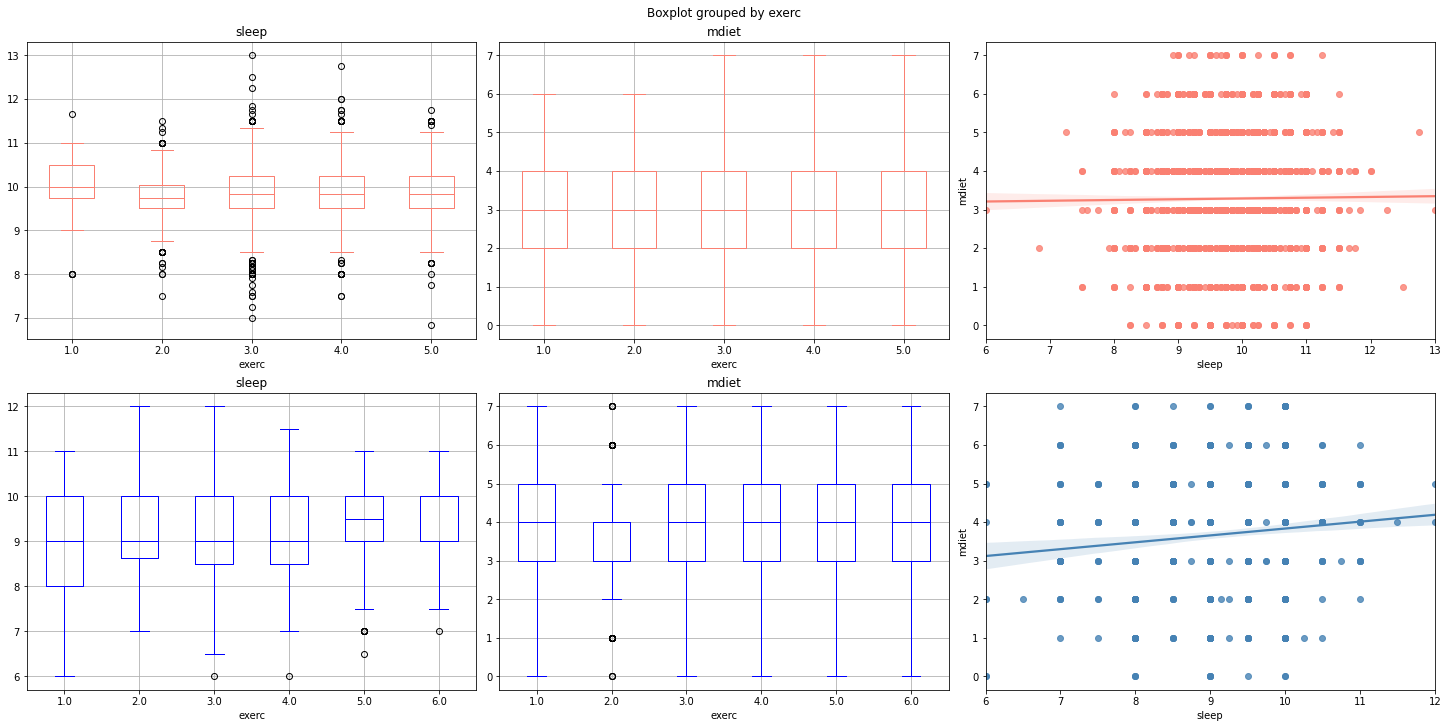

In [6]:
f, [(ax1,ax2,ax3),((ax4,ax5,ax6))] = plt.subplots(2,3, constrained_layout=True, figsize=(20, 10))

AL.boxplot('sleep', by='exerc', ax=ax1, color='salmon')
AL.boxplot('mdiet', by='exerc', ax=ax2, color='salmon')
sns.regplot(AL['sleep'], AL['mdiet'], 'o', ax=ax3,color='salmon');

GR.boxplot('sleep', by='exerc', ax=ax4, color='blue')
GR.boxplot('mdiet', by='exerc', ax=ax5, color='blue')
sns.regplot(GR['sleep'], GR['mdiet'], 'o', ax=ax6, color='steelblue')

/Users/Serena/.pyenv/versions/3.9.1/envs/els/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


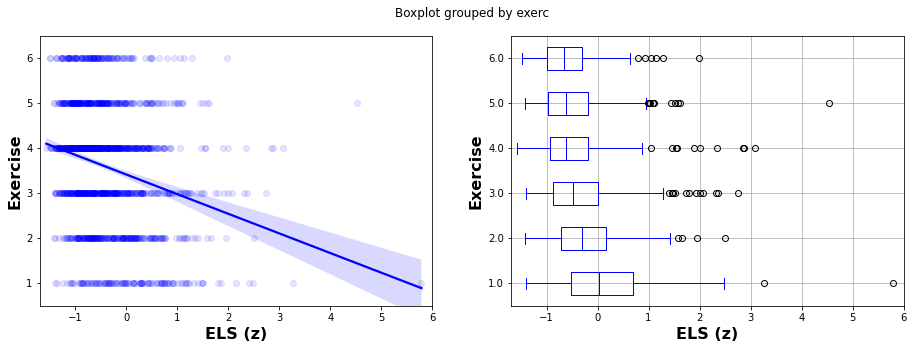

In [43]:
f, axs = plt.subplot_mosaic('AB', figsize=(15,5))

r = sns.regplot(GR['ELS_z'], GR['exerc'], color='blue', ax=axs['A'], scatter_kws={'marker':'s','alpha':0.1})
b = GR.boxplot('ELS_z', by='exerc', color='blue', vert=False, ax=axs['B'])

for a in [r, b]:
    a.set_ylabel('Exercise', fontsize=16, fontweight='bold')
    a.set_xlabel('ELS (z)', fontsize=16, fontweight='bold')
    a.set_title('')
    a.set(xlim=(-1.7, 6), ylim=(0.5,6.5))


### 3d PLOTS

In [ ]:
AL = pd.read_csv('../ALSPAC/Data/byimp/imp0.csv')
GR = pd.read_csv('../GENR/Data/byimp/imp0.csv')

In [ ]:

def plot_int(cohort, mod, out, ax3, exp='ELS_z'): # fig=plt.figure(figsize = (16, 5))):
    
    ms = {'exercise_z':['exerc','Exercise'],
          'sleep_hr_z':['sleep','Sleep'],
          'med_diet_z':['mdiet','Diet']}
    os = {'intern_score_13_z':['intr', 'Internalizing'],
       'tot_fat_percent_13_z':['fatm','Adiposity']}
    
    # Read in last imputation 
    d = pd.read_csv('../'+cohort+'/Data/byimp/imp30.csv')
    # Create data array with X = all predictors
    # Note: .values converts pandas series object into array so we can use linalg on it later
    pred = d[[exp, mod, 'age_child','sex', 'ethnicity','m_bmi_before_pregnancy','m_smoking','m_drinking']].values
    
    # Obtain ranges of stress and moderators
    mn = np.min(pred, axis=0); mx = np.max(pred, axis=0)
    # Create a 20x20 grid within ranges 
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    XX = X.flatten()
    YY = Y.flatten()
    
    # Define the prediction matrix (i.e., 1st model adjusted for age and sex)
    A = np.c_[np.ones(pred.shape[0]), pred, np.prod(pred[:,:2], axis=1)]

    # Get the betas from the pooled analysis in script 4-Regressions.R
    res = globals()[cohort+'_'+ms[mod][0]+'_'+os[out][0]]
    bs = np.array(res['estimate'])
    # Evaluate it on a grid (intercept, main effects and interaction)
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY], bs[[0,1,2,9]]).reshape(X.shape) 
    
    # ============================================
    # Define subplots 
    # ax = fig.add_subplot(121); # ax2 = fig.add_subplot(132)
    # ax3 = fig.add_subplot(111, projection='3d')
    
    cls = ['red','blue']
#     axs = [ax1,ax2]; main = [exp,mod]; 
#     for i, ax in enumerate(axs):
#         # Scatterplot --------------------------------
#         ax.plot(d[main[i]], d[out], 'o', color = 'k', alpha = 0.1)
#         # Add a grid 
#         ax.grid()
#         # Regression line
#         b = bs[i+1]
#         ax.plot(d[main[i]], b+(b*d[main[i]]), color = cls[i], lw = 2.5)
#         # Set labels for the axes
#         xlab = 'ELS (z)' if i==0 else ms[mod][1]+' (z)'
#         ax.set_xlabel(xlab, fontsize = 17, fontweight = 'bold')
#         if i==0: 
#             ax.set_ylabel(os[out][1]+' (z)', fontsize = 17, fontweight = 'bold')

#     # Scatterplot --------------------------------
#     ax.plot(d[mod], d[out], 'o', color = 'k', alpha = 0.1)
#     # Add a grid 
#     ax.grid()
#     # Regression line
#     ax.plot(d[mod], bs[2]+(bs[2]*d[mod]), color = cls[1], lw = 2.5)
#     # Set labels for the axes
#     ax.set_xlabel(ms[mod][1]+' (z)', fontsize = 17, fontweight = 'bold')
#     ax.set_ylabel(os[out][1]+' (z)', fontsize = 17, fontweight = 'bold')
        
    # 3D plot 
    ax3.scatter(d[exp], d[mod], d[out]+bs[0]/2, s = 20, alpha = 0.03, facecolors='none', edgecolors='k')
    # Regression surface
    ax3.plot_surface(X, Y, Z, rstride = 2, cstride = 2, edgecolor = 'none', color = 'grey', alpha = 0.3) # ,cmap='magma'
    # Main effect lines 
    ax3.plot(d[exp], np.zeros(d.shape[0]), bs[1]*d[exp]+bs[0], c = cls[0], lw = 2.5) 
    ax3.plot(np.zeros(d.shape[0]), d[mod], bs[2]*d[mod]+bs[0], c = cls[1], lw = 2.5) 
    # Set labels for the axes
    ax3.set_xlabel('ELS (x)', fontsize = 17, fontweight = 'bold',labelpad=10)
    ax3.set_ylabel(ms[mod][1]+' (z)', fontsize = 17, fontweight = 'bold', labelpad=10)
    ax3.set_zlabel(os[out][1]+' (z)', fontsize = 17, fontweight = 'bold')
    # Invert
    ax3.invert_xaxis()
    # Adjust the plot size to fit the 2D plots 
    ax3.dist = 3 # higher numbers, smaller plots
    # Rotate
    ax3.view_init(10, 35)
    
    cohort_col = '#FDECEA' if cohort=='ALSPAC' else '#D6EFFE'
    ax3.set_facecolor(cohort_col) 


In [ ]:
# plt.rcParams['figure.constrained_layout.use'] = True
f = plt.figure(constrained_layout=True, figsize=(10, 12))

f.suptitle('INTERNALIZING', fontsize=f1, fontweight='bold')

sf1, sf2 = f.subfigures(1, 2, wspace=0.01)

sf1.set_facecolor('#D6EFFE') # lightblue
sf2.set_facecolor('#FDECEA') # pink

sf1.ax1 = sf1.add_subplot(311, projection='3d')
sf1.ax2 = sf1.add_subplot(312, projection='3d')
sf1.ax3 = sf1.add_subplot(313, projection='3d')

plot_int('GENR','exercise_z','intern_score_13_z', ax3=sf1.ax1)
plot_int('GENR','sleep_hr_z','intern_score_13_z', ax3=sf1.ax2)
plot_int('GENR','med_diet_z','intern_score_13_z', ax3=sf1.ax3)

sf2.ax1 = sf2.add_subplot(311, projection='3d')
sf2.ax2 = sf2.add_subplot(312, projection='3d')
sf2.ax3 = sf2.add_subplot(313, projection='3d')

plot_int('ALSPAC','exercise_z','intern_score_13_z', ax3=sf2.ax1)
plot_int('ALSPAC','sleep_hr_z','intern_score_13_z', ax3=sf2.ax2)
plot_int('ALSPAC','med_diet_z','intern_score_13_z', ax3=sf2.ax3)

f.savefig(respath+'5.intern3d.pdf', dpi=400, bbox_inches='tight')

In [ ]:
f = plt.figure(constrained_layout=True, figsize=(10, 12))

f.suptitle('ADIPOSITY', fontsize=f1, fontweight='bold')

sf1, sf2 = f.subfigures(1, 2, wspace=0.01)

sf1.set_facecolor('#D6EFFE') # lightblue
sf2.set_facecolor('#FDECEA') # pink

sf1.ax1 = sf1.add_subplot(311, projection='3d')
sf1.ax2 = sf1.add_subplot(312, projection='3d')
sf1.ax3 = sf1.add_subplot(313, projection='3d')

plot_int('GENR','exercise_z','tot_fat_percent_13_z', ax3=sf1.ax1)
plot_int('GENR','sleep_hr_z','tot_fat_percent_13_z', ax3=sf1.ax2)
plot_int('GENR','med_diet_z','tot_fat_percent_13_z', ax3=sf1.ax3)

sf2.ax1 = sf2.add_subplot(311, projection='3d')
sf2.ax2 = sf2.add_subplot(312, projection='3d')
sf2.ax3 = sf2.add_subplot(313, projection='3d')

plot_int('ALSPAC','exercise_z','tot_fat_percent_13_z', ax3=sf2.ax1)
plot_int('ALSPAC','sleep_hr_z','tot_fat_percent_13_z', ax3=sf2.ax2)
plot_int('ALSPAC','med_diet_z','tot_fat_percent_13_z', ax3=sf2.ax3)

f.savefig(respath+'5.adipos3d.pdf', dpi=400, bbox_inches='tight')

In [ ]:
# Plot betas inernalizing
f, axs = plt.subplots(1,3, constrained_layout=True, figsize=(15, 4))

mod_labels = ['Exercise','Sleep','Diet']

def plot_add(cohort='GENR', exp = 'els', axs=axs):
    outcs=['int','fat','com']
    for i, ax in enumerate(axs.flatten()):
        d = globals()[cohort+'_ad_'+exp+'_'+outcs[i]]
        if outcs[i]=='com': d = d.loc[d['y.level']=='H:comorb']
        
        # extract estimates
        mods = d.loc[d.index.str.contains('^exerc|^sleep|^mdiet',na=False)]
        elsz = d.loc[d.index.str.contains(exp, na=False, case=False)].iloc[:3,] # exclude sleep SR
    # plot them
        ax.errorbar(mods['estimate'], mod_labels, xerr = list(mods['std.error']*1.96), color='black',
                     fmt='s', ms=10, elinewidth=3, capsize=10)
        ax.errorbar(elsz['estimate'], mod_labels, xerr = list(elsz['std.error']*1.96), color='black',
                    fmt='s', ms=10, elinewidth=3, capsize=10, alpha=0.3)
        ax.axvline(x = 0, color = 'grey', ls = '--', lw = 1)
        ax.invert_yaxis()
    
plot_add()